# Data exploration

In [1]:
import os
import zipfile
import requests

def download_data(url, name, path='data'):
    if not os.path.exists(path):
        os.mkdir(path)

    response = requests.get(url)
    with open(os.path.join(path, name), 'wb') as f:
        f.write(response.content)

    z = zipfile.ZipFile(os.path.join(path, 'vehicles.zip'))
    z.extractall(path)

VEHICLES = 'http://bit.ly/ddl-cars'

download_data(VEHICLES, 'vehicles.zip')

In [2]:
# load it into a pandas data frame.
import pandas as pd
path = 'data'
vehicles = pd.read_csv(os.path.join(path, 'vehicles.csv'))

/opt/conda/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2871: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
vehicles.describe()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend,charge240b,phevCity,phevHwy,phevComb
count,37843.000000,37843.000000,37843.0,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,...,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000
mean,17.532506,0.216169,0.0,0.023531,17.941389,4.042737,0.520149,0.327163,0.000406,0.184790,...,22.587229,0.652380,33.619221,0.933845,2000.064398,-2658.999022,0.004360,0.069313,0.068203,0.068573
std,4.575950,1.141527,0.0,0.427647,6.660360,9.645820,3.837874,3.542596,0.039918,2.904558,...,9.350163,5.284547,10.048326,6.059456,10.390588,2553.098329,0.142776,1.966806,1.871986,1.913647
min,0.060000,0.000000,0.0,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1984.000000,-22250.000000,0.000000,0.000000,0.000000,0.000000
25%,14.330870,0.000000,0.0,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.000000,0.000000,27.100000,0.000000,1990.000000,-4250.000000,0.000000,0.000000,0.000000,0.000000
50%,17.347895,0.000000,0.0,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21.000000,0.000000,33.000000,0.000000,2001.000000,-2500.000000,0.000000,0.000000,0.000000,0.000000
75%,20.600625,0.000000,0.0,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,25.139300,0.000000,38.109600,0.000000,2009.000000,-750.000000,0.000000,0.000000,0.000000,0.000000
max,47.087143,18.311667,0.0,12.000000,138.000000,138.304000,127.000000,127.093000,5.350000,122.000000,...,197.577100,181.560900,159.100000,152.187800,2017.000000,4000.000000,7.000000,97.000000,79.000000,88.000000


Clean it up by dropping columns we don't need, removing vehicles that are coming out in the future, removing any duplicate records, and then sorting the data by make, model, and year.

In [4]:
select_columns = ['make', 'model', 'year', 'displ', 'cylinders', 'trany', 'drive', 'VClass','fuelType',
                  'barrels08', 'city08', 'highway08', 'comb08', 'co2TailpipeGpm', 'fuelCost08']

vehicles = vehicles[select_columns][vehicles.year <= 2016].drop_duplicates().dropna()

vehicles = vehicles.sort(['make', 'model', 'year'])

vehicles.head()

/opt/conda/lib/python3.4/site-packages/IPython/kernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,make,model,year,displ,cylinders,trany,drive,VClass,fuelType,barrels08,city08,highway08,comb08,co2TailpipeGpm,fuelCost08
19316,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
19314,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
358,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
369,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
25797,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


## Identify stage

**Prep Phase**. The first thing we're going to do is identify the types of information contained in our data set, which will help us get to know our data a bit better and prepare us to think about the data in different ways. After that, we will identify the **entities** in our data set so that we are aware of the different levels to which we can **aggregate** up or **drill down**.

## Types of Information

There are a few distinct types of information that jump out at us just from taking a quick look at the data set.

- Vehicle attributes information
- Vehicle manufacturer information
- Engine information
- Fuel information (such as fuel efficiency, fuel type, and fuel cost)
- Transmission information
- Drive axle information



## Part 2

In [6]:
# Renaming columns:
vehicles.columns = ['Make','Model','Year','Engine Displacement','Cylinders', 'Transmission','Drivetrain',
                    'Vehicle Class','Fuel Type', 'Fuel Barrels/Year','City MPG','Highway MPG','Combined MPG',
                    'CO2 Emission Grams/Mile','Fuel Cost/Year']

## Thinking About Categorization

Categorization is just a way that humans structure information.

In this stage of the framework, we are going to create additional categories in 3 distinct ways:

- Category Aggregations
- Binning Continuous Variables
- Clustering


## Aggregating to Higher-Level Categories

The first way we are going to create additional categories is by identifying opportunities to create higher-level categories out of the variables we already have in our data set. In order to do this, we need to get a sense of what categories currently exist in the data. We can do this by iterating through our columns and printing out the name, the number of unique values, and the data type for each.

In [10]:
def unique_col_values(df):
    """
      df: pandas dataframe
    """
    for column in df:
        print("{} | {} | {}".format(
                df[column].name, len(df[column].unique()), df[column].dtype
            ))

In [16]:
unique_col_values(vehicles)

Make | 126 | object
Model | 3490 | object
Year | 33 | int64
Engine Displacement | 65 | float64
Cylinders | 9 | float64
Transmission | 44 | object
Drivetrain | 7 | object
Vehicle Class | 34 | object
Fuel Type | 13 | object
Fuel Barrels/Year | 116 | float64
City MPG | 48 | int64
Highway MPG | 49 | int64
Combined MPG | 46 | int64
CO2 Emission Grams/Mile | 550 | float64
Fuel Cost/Year | 55 | int64
Transmission Type | 2 | object


When aggregating and summarizing data, having too many categories can be problematic. The average human is said to have the ability to hold **7 objects at a time** in their short-term working memory. Accordingly, I have noticed that once **you exceed 8-10 discrete values in a category**, it becomes increasingly difficult to get a holistic picture of how the entire data set is divided up.

For example, imagine aggregating by Transmission, which has 43 discrete values in our data set. It is going to be difficult to derive insights due to the fact that any aggregated metrics are going to be distributed across more categories than you can hold in short-term memory. However, if we examine the different transmission categories with the goal of finding common features that we can group on, we would find that all 43 values fall into one of two transmission types, Automatic or Manual.

In [14]:
vehicles.Transmission[:20]

19316    Automatic 3-spd
19314    Automatic 3-spd
358      Automatic 3-spd
369      Automatic 3-spd
25797    Automatic 4-spd
3678     Automatic 4-spd
3680        Manual 5-spd
3681     Automatic 4-spd
4488     Automatic 4-spd
4489        Manual 5-spd
4491     Automatic 4-spd
5372     Automatic 4-spd
5373        Manual 5-spd
5374     Automatic 4-spd
1989     Automatic 4-spd
2972     Automatic 4-spd
2973     Automatic 4-spd
3803     Automatic 4-spd
3804     Automatic 4-spd
4627     Automatic 4-spd
Name: Transmission, dtype: object

In [15]:
AUTOMATIC = "Automatic"
MANUAL = "Manual"

vehicles.loc[vehicles['Transmission'].str.startswith('A'),
             'Transmission Type'] = AUTOMATIC

vehicles.loc[vehicles['Transmission'].str.startswith('M'),
             'Transmission Type'] = MANUAL

We can apply the same logic to the **Vehicle Class** field. We originally have 34 vehicle classes, but we can distill those down into 8 vehicle categories, which are much easier to remember.

In [17]:
vehicles['Vehicle Class'][:20]

19316    Special Purpose Vehicle 2WD
19314    Special Purpose Vehicle 2WD
358      Special Purpose Vehicle 2WD
369      Special Purpose Vehicle 2WD
25797                   Midsize Cars
3678                 Subcompact Cars
3680                 Subcompact Cars
3681                 Subcompact Cars
4488                 Subcompact Cars
4489                 Subcompact Cars
4491                 Subcompact Cars
5372                 Subcompact Cars
5373                 Subcompact Cars
5374                 Subcompact Cars
1989                    Compact Cars
2972                    Compact Cars
2973                    Compact Cars
3803                    Compact Cars
3804                    Compact Cars
4627                    Compact Cars
Name: Vehicle Class, dtype: object

In [18]:
small = ['Compact Cars','Subcompact Cars','Two Seaters','Minicompact Cars']
midsize = ['Midsize Cars']
large = ['Large Cars']

vehicles.loc[vehicles['Vehicle Class'].isin(small), 
             'Vehicle Category'] = 'Small Cars'

vehicles.loc[vehicles['Vehicle Class'].isin(midsize), 
             'Vehicle Category'] = 'Midsize Cars'

vehicles.loc[vehicles['Vehicle Class'].isin(large), 
             'Vehicle Category'] = 'Large Cars'

vehicles.loc[vehicles['Vehicle Class'].str.contains('Station'), 
             'Vehicle Category'] = 'Station Wagons'

vehicles.loc[vehicles['Vehicle Class'].str.contains('Truck'), 
             'Vehicle Category'] = 'Pickup Trucks'

vehicles.loc[vehicles['Vehicle Class'].str.contains('Special Purpose'), 
             'Vehicle Category'] = 'Special Purpose'

vehicles.loc[vehicles['Vehicle Class'].str.contains('Sport Utility'), 
             'Vehicle Category'] = 'Sport Utility'

vehicles.loc[(vehicles['Vehicle Class'].str.lower().str.contains('van')),
             'Vehicle Category'] = 'Vans & Minivans'

Next, let's look at the Make and Model fields, which have 126 and 3,491 unique values respectively. While I can't think of a way to get either of those down to 8-10 categories, we can create another potentially informative field by concatenating Make and the first word of the Model field together into a new Model Type field. This would allow us to, for example, categorize all Chevrolet Suburban C1500 2WD vehicles and all Chevrolet Suburban K1500 4WD vehicles as simply Chevrolet Suburbans.

In [19]:
vehicles['Model Type'] = (vehicles['Make'] + " " +
                          vehicles['Model'].str.split().str.get(0))

Finally, let's look at the Fuel Type field, which has 13 unique values

In [20]:
vehicles['Fuel Type'].unique()

array(['Regular', 'Premium', 'Diesel', 'Premium and Electricity',
       'Premium or E85', 'Premium Gas or Electricity', 'Gasoline or E85',
       'Gasoline or natural gas', 'CNG', 'Regular Gas or Electricity',
       'Midgrade', 'Regular Gas and Electricity', 'Gasoline or propane'], dtype=object)

In [21]:
vehicles['Gas'] = 0
vehicles['Ethanol'] = 0
vehicles['Electric'] = 0
vehicles['Propane'] = 0
vehicles['Natural Gas'] = 0

vehicles.loc[vehicles['Fuel Type'].str.contains(
        'Regular|Gasoline|Midgrade|Premium|Diesel'),'Gas'] = 1

vehicles.loc[vehicles['Fuel Type'].str.contains('E85'),'Ethanol'] = 1

vehicles.loc[vehicles['Fuel Type'].str.contains('Electricity'),'Electric'] = 1

vehicles.loc[vehicles['Fuel Type'].str.contains('propane'),'Propane'] = 1

vehicles.loc[vehicles['Fuel Type'].str.contains('natural|CNG'),'Natural Gas'] = 1

As it turns out, 99% of the vehicles in our database have gas as a fuel type, either by itself or combined with another fuel type. Since that is the case, let's create a second set of categories - specifically, a new Gas Type field that extracts the type of gas (Regular, Midgrade, Premium, Diesel, or Natural) each vehicle accepts.

In [22]:
vehicles.loc[vehicles['Fuel Type'].str.contains(
        'Regular|Gasoline'),'Gas Type'] = 'Regular'

vehicles.loc[vehicles['Fuel Type'] == 'Midgrade',
             'Gas Type'] = 'Midgrade'

vehicles.loc[vehicles['Fuel Type'].str.contains('Premium'),
             'Gas Type'] = 'Premium'

vehicles.loc[vehicles['Fuel Type'] == 'Diesel',
             'Gas Type'] = 'Diesel'

vehicles.loc[vehicles['Fuel Type'].str.contains('natural|CNG'),
             'Gas Type'] = 'Natural'

## Creating Categories from Continuous Variables

The next way we can create additional categories in our data is by binning some of our continuous variables - breaking them up into different categories based on a **threshold** or **distribution**. There are multiple ways you can do this, but I like to use **quintiles** because it gives me one middle category, two categories outside of that which are moderately higher and lower, and then two extreme categories at the ends. I find that this is a very intuitive way to break things up and provides some consistency across categories. In our data set, I've identified 4 fields that we can bin this way.

In [24]:
efficiency_categories = ['Very Low Efficiency', 'Low Efficiency',
                         'Moderate Efficiency','High Efficiency',
                         'Very High Efficiency']

vehicles['Fuel Efficiency'] = pd.qcut(vehicles['Combined MPG'], 5, efficiency_categories)

engine_categories = ['Very Small Engine', 'Small Engine','Moderate Engine','Large Engine', 'Very Large Engine']

vehicles['Engine Size'] = pd.qcut(vehicles['Engine Displacement'], 5, engine_categories)

emission_categories = ['Very Low Emissions', 'Low Emissions',
                        'Moderate Emissions','High Emissions',
                        'Very High Emissions']

vehicles['Emissions'] = pd.qcut(vehicles['CO2 Emission Grams/Mile'], 5, emission_categories)

fuelcost_categories = ['Very Low Fuel Cost', 'Low Fuel Cost',
                       'Moderate Fuel Cost','High Fuel Cost',
                       'Very High Fuel Cost']

vehicles['Fuel Cost'] = pd.qcut(vehicles['Fuel Cost/Year'],
                                5, fuelcost_categories)

## Clustering to Create Additional Categories

The final way we are going to prepare our data is by clustering to create additional categories. There are a few reasons why I like to use clustering for this. First, **it takes multiple fields into consideration together** at the same time, whereas the other categorization methods only consider one field at a time. This will allow you to categorize together entities that are similar across a variety of attributes, but might not be close enough in each individual attribute to get grouped together.

Clustering also **creates new categories** for you automatically, which takes much less time than having to comb through the data yourself identifying patterns across attributes that you can form categories on. It will automatically group similar items together for you.

The third reason I like to use clustering is because it will sometimes group things in ways that you, as a human, may not have thought of.

In [25]:
cluster_columns = ['Engine Displacement','Cylinders','Fuel Barrels/Year',
                   'City MPG','Highway MPG','Combined MPG',
                   'CO2 Emission Grams/Mile', 'Fuel Cost/Year']

Next, we want to scale the features we are going to cluster on. There are a variety of ways to normalize and scale variables, but I'm going to keep things relatively simple and just use Scikit-Learn's MaxAbsScaler, which will divide each value by the max absolute value for that feature. This will preserve the distributions in the data and convert the values in each field to a number between 0 and 1 (technically -1 and 1, but we don't have any negatives).

In [28]:
from sklearn import preprocessing
scaler = preprocessing.MaxAbsScaler()

vehicles_cluster = scaler.fit_transform(vehicles[cluster_columns])
vehicles_cluster = pd.DataFrame(vehicles_cluster, columns=cluster_columns)

In [29]:
vehicles_cluster.head()

,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,0.297619,0.250,0.411765,0.310345,0.278689,0.303571,0.411765,0.336207
1,0.500000,0.375,0.538462,0.224138,0.213115,0.232143,0.538462,0.439655
2,0.297619,0.250,0.437500,0.275862,0.278689,0.285714,0.437500,0.362069
3,0.500000,0.375,0.538462,0.224138,0.213115,0.232143,0.538462,0.439655
4,0.452381,0.375,0.437500,0.241379,0.344262,0.285714,0.437500,0.439655


Now that our features are scaled, let's write a couple of functions. The first function we are going to write is a kmeans_cluster function that will k-means cluster a given data frame into a specified number of clusters. It will then return a copy of the original data frame with those clusters appended in a column named Cluster.

In [34]:
from sklearn.cluster import KMeans

def kmeans_cluster(df, n_cluster=2):
    model = KMeans(n_clusters=n_cluster, random_state=1)
    clusters = model.fit_predict(df)
    cluster_results =df.copy()
    cluster_results['Cluster'] = clusters
    return cluster_results

Our second function, called summarize_clustering is going to **count** the number of vehicles that fall into each cluster and calculate the cluster means for each feature. It is going to merge the counts and means into a single data frame and then return that summary to us.

In [37]:
def summarize_clustering(results):
    cluster_size = results.groupby(['Cluster']).size().reset_index()
    cluster_size.columns = ['Cluster', 'Count']
    cluster_means = results.groupby(['Cluster'], as_index=False).mean()
    cluster_summary = pd.merge(cluster_size, cluster_means, on='Cluster')
    
    return cluster_summary

We now have functions for what we need to do, so the next step is to actually **cluster our data**.
How do we determine how many clusters we want?

There are a number of approaches for figuring this out, but for the sake of simplicity, we are just going to plug in a couple of numbers and visualize the results to arrive at a good enough estimate. Remember earlier we were trying to aggregate our categorical variables to less than 8-10 discrete values? 
We are going to apply the same logic here. Let's start out with 8 clusters and see what kind of results we get.

In [39]:
cluster_results = kmeans_cluster(vehicles_cluster, 8)
cluster_summary = summarize_clustering(cluster_results)

cluster_summary

,Cluster,Count,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,0,6334,0.241518,0.254243,0.281230,0.383366,0.487341,0.447303,0.281191,0.240410
1,1,2912,0.595553,0.500215,0.395664,0.262860,0.360903,0.315677,0.400217,0.364192
2,2,3999,0.631932,0.501500,0.495338,0.218378,0.281825,0.255475,0.495517,0.422733
3,3,5838,0.267466,0.253950,0.346015,0.314615,0.392238,0.363536,0.345953,0.298589
4,4,7704,0.382627,0.374854,0.353653,0.297454,0.405367,0.355896,0.353625,0.314951
5,5,1826,0.200601,0.244660,0.215546,0.518356,0.616882,0.587946,0.216954,0.183282
6,6,4766,0.446931,0.373387,0.437697,0.249606,0.310320,0.287299,0.437672,0.371041
7,7,1716,0.682005,0.570950,0.601364,0.178472,0.234963,0.210290,0.601190,0.544153


By looking at the Count column, you can tell that there are some clusters that have significantly more records in them (ex. Cluster 0) and others that have significantly fewer (ex. Cluster 5). Other than that, though, it is difficult to notice anything informative about the summary.

This is a prime opportunity to use a visualization to discover insights faster. With just a couple import statements and a single line of code, we can light this summary up in a heatmap so that we can see the contrast between all those decimals and between the different clusters.

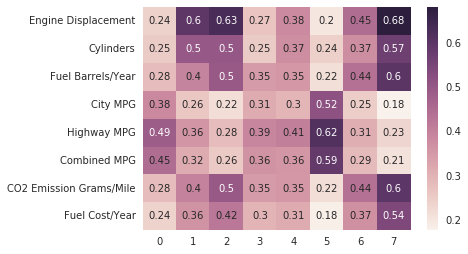

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cluster_summary[cluster_columns].transpose(), annot=True)

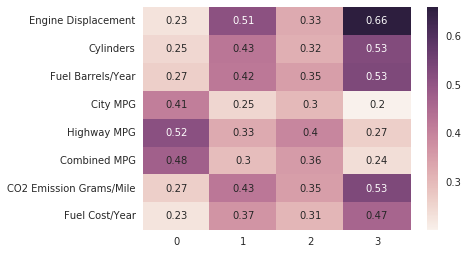

In [43]:
cluster_results = kmeans_cluster(vehicles_cluster, 4)
cluster_summary = summarize_clustering(cluster_results)

sns.heatmap(cluster_summary[cluster_columns].transpose(), annot=True)